In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filepath=r"D:\Data_Science_Work\Fake_Job_Classification\Data\fake_job_postings.csv"
df = pd.read_csv(filepath)
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df.shape
# look for null values 
df.isnull().sum().sort_values(ascending=False)

salary_range           15012
department             11547
required_education      8105
benefits                7212
required_experience     7050
function                6455
industry                4903
employment_type         3471
company_profile         3308
requirements            2696
location                 346
description                1
title                      0
job_id                     0
telecommuting              0
has_questions              0
has_company_logo           0
fraudulent                 0
dtype: int64

<Axes: >

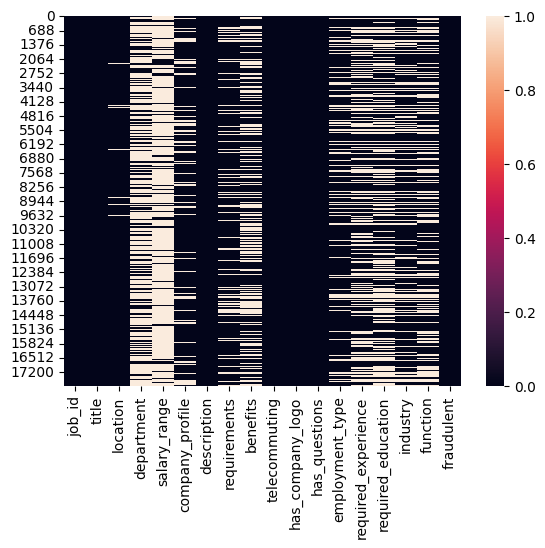

In [9]:
sns.heatmap(df.isnull())

fraudulent
0    0.951566
1    0.048434
Name: proportion, dtype: float64


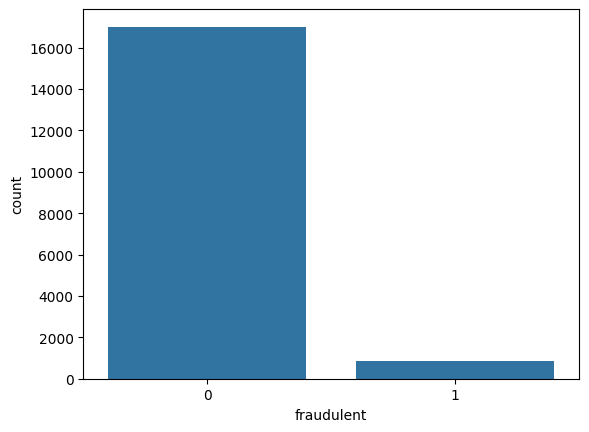

In [8]:
#check for coloumn type 
df.dtypes
#Look at class balance
df['fraudulent'].value_counts(normalize=True)
#Sample a few text-heavy fields
df['description'][0]
#Plot a few distributions
sns.countplot(x='fraudulent', data=df)

 #Check percentages
print(df['fraudulent'].value_counts(normalize=True))


In [ ]:
# Cleaned Data

# Load cleaned dataset
df = pd.read_csv('../data/cleaned_fake_jobs.csv')

# Show basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17169 entries, 0 to 17168
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17169 non-null  object
 1   location             17169 non-null  int64 
 2   department           17169 non-null  int64 
 3   company_profile      13974 non-null  object
 4   description          17169 non-null  object
 5   requirements         14699 non-null  object
 6   benefits             10320 non-null  object
 7   employment_type      17169 non-null  int64 
 8   required_experience  17169 non-null  int64 
 9   required_education   17169 non-null  int64 
 10  industry             17169 non-null  int64 
 11  function             17169 non-null  int64 
 12  fraudulent           17169 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 1.7+ MB


,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,2535,750,were food52 and weve created a groundbreaking ...,food52 a fastgrowing james beard awardwinning ...,experience with content management systems a m...,NaN,2,4,9,123,22,0
1,Customer Service - Cloud Video Production,1073,1151,90 seconds the worlds cloud video production s...,organised focused vibrant awesomedo you have a...,what we expect from youyour key responsibility...,what you will get from usthrough being part of...,1,6,9,75,7,0
2,Commissioning Machinery Assistant (CMA),1867,1231,valor services provides workforce solutions th...,our client located in houston is actively seek...,implement precommissioning and commissioning p...,NaN,5,7,9,123,36,0
3,Account Executive - Washington DC,1703,1045,our passion for improving quality of life thro...,the company esri environmental systems researc...,education bachelors or masters in gis business...,our culture is anything but corporatewe have a...,1,5,1,22,31,0
4,Bill Review Manager,1741,1231,spotsource solutions llc is a global human cap...,job title itemization review managerlocation f...,qualificationsrn license in the state of texas...,full benefits offered,1,5,1,51,16,0


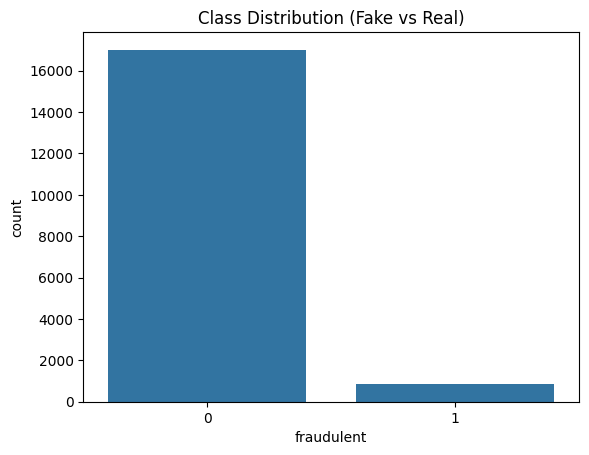

fraudulent
0    0.951566
1    0.048434
Name: proportion, dtype: float64


In [7]:
#Check class balance (Fake vs Real)
sns.countplot(x='fraudulent', data=df)
plt.title('Class Distribution (Fake vs Real)')
plt.show()

# Check percentages
print(df['fraudulent'].value_counts(normalize=True))


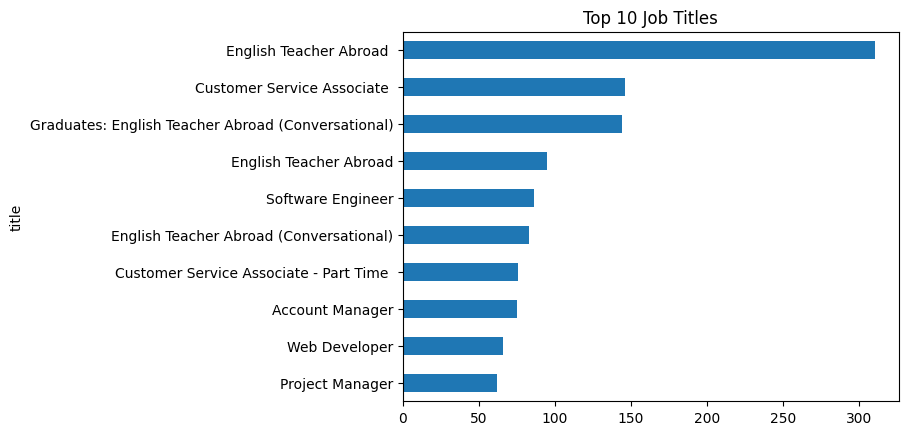

In [9]:
#Check job titles and locations
top_titles = df['title'].value_counts().head(10)
top_titles.plot(kind='barh', title='Top 10 Job Titles')
plt.gca().invert_yaxis()
plt.show()


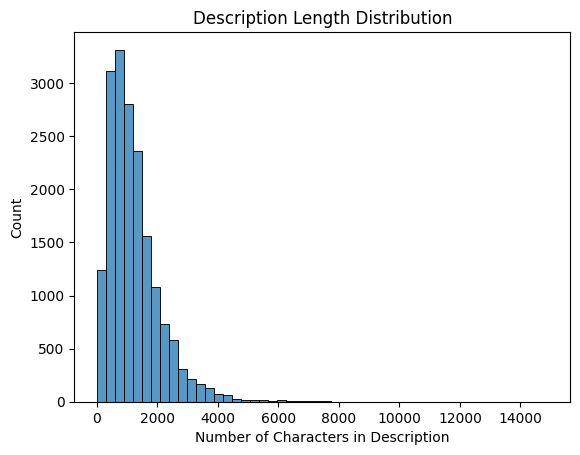

In [11]:
# Check text length distributions
df['description'] = df['description'].fillna('').astype(str)
df['description_length'] = df['description'].apply(len)

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['description_length'], bins=50)
plt.title('Description Length Distribution')
plt.xlabel('Number of Characters in Description')
plt.ylabel('Count')
plt.show()



